In [30]:
#!/usr/bin/python

import os
print(os.listdir("../input"))

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import datetime

#import standard ML libraries
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.utils.multiclass import unique_labels

#keras NN libraries:
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras import regularizers
from keras.constraints import max_norm
from sklearn.preprocessing import StandardScaler, RobustScaler, Binarizer, KernelCenterer
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

#import specific classifiers
from sklearn.ensemble import RandomForestClassifier
print('Lib import check positive ++.')

# Any results you write to the current directory are saved as output.

['sample_submission.csv', 'test.csv', 'train.csv']
Lib import check positive ++.


In [10]:
test_data = pd.read_csv('../input/test.csv')
print("Test data :", test_data.shape)
train_data = pd.read_csv('../input/train.csv')
print("Train data :", train_data.shape)
target = pd.read_csv('../input/sample_submission.csv')
print("Target :", target.shape)

Test data : (200000, 201)
Train data : (200000, 202)
Target : (200000, 2)


In [11]:
#check a sample output of first few rows:
print(train_data.head(5))

   ID_code  target    var_0   var_1   ...     var_196  var_197  var_198  var_199
0  train_0       0   8.9255 -6.7863   ...      7.8784   8.5635  12.7803  -1.0914
1  train_1       0  11.5006 -4.1473   ...      8.1267   8.7889  18.3560   1.9518
2  train_2       0   8.6093 -2.7457   ...     -6.5213   8.2675  14.7222   0.3965
3  train_3       0  11.0604 -2.1518   ...     -2.9275  10.2922  17.9697  -8.9996
4  train_4       0   9.8369 -1.4834   ...      3.9267   9.5031  17.9974  -8.8104

[5 rows x 202 columns]


In [12]:
def data_target_split (df):
    X = df.iloc[:,2:].values
    y = df.iloc[:,1].values
    return X, y
X, y = data_target_split(train_data)
#select the right part of the final test data
test_data = test_data.iloc[:,1:].values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 329)

In [14]:
#scale the X_train with Min Max scaler:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr_scaled = scaler.transform(X_train)
X_tst_scaled = scaler.transform(X_test)

#check the output shapes:
X_train.shape, y_train.shape

((150000, 200), (150000,))

In [27]:
def auc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [16]:
def make_model():
    model = Sequential()

    #input 
    model.add(Dense(200, input_dim=200, kernel_initializer = 'uniform', 
                    kernel_regularizer=regularizers.l2(0.005), kernel_constraint = max_norm(5.)))
    model.add(Activation("relu"))
    model.add(Dropout(0.2))

    #1 
    model.add(Dense(200, kernel_initializer = 'uniform', 
                    kernel_regularizer=regularizers.l2(0.005), kernel_constraint=max_norm(5)))
    model.add(Activation("relu"))
    model.add(Dropout(0.1))
    
    #2
    model.add(Dense(100, kernel_initializer = 'uniform', 
                    kernel_regularizer=regularizers.l2(0.005), kernel_constraint=max_norm(5)))
    model.add(Activation('relu'))
    model.add(Dropout(0.1))
    
    #2
    model.add(Dense(50, kernel_initializer = 'uniform', 
                    kernel_regularizer=regularizers.l2(0.005), kernel_constraint=max_norm(5)))
    model.add(Activation('tanh'))
    model.add(Dropout(0.1))
    
    #output
    model.add(Dense(1, activation = 'sigmoid'))

    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", auc])
    return model

In [19]:
def train_model_iterate(X, y, test):
    model = make_model()
    pred = pd.DataFrame()
    for i in range(1, 3):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = i)
        earlystopper = EarlyStopping(patience=5, verbose=1)
        history = model.fit(X_train, y_train, batch_size=15600, epochs=500, validation_split=0.2, verbose=2, callbacks=[earlystopper], shuffle=True)
        scores = model.evaluate(X_test, y_test, verbose=0)
        print("accuracy for test data: %.2f%%" % (scores[1]*100))
        plt.plot(history.history['acc'], label='accuracy for train data')
        plt.plot(history.history['val_acc'], label='validation data accuracy')
        plt.xlabel('epochs')
        plt.ylabel('accuracy')
        plt.legend()
        plt.show()
        y_pred = model.predict(X_test)
        y_pred = (y_pred > 0.7)
        cm = confusion_matrix(y_test, y_pred)
        print(cm)
        y_pred_t = model.predict(test)
        print(y_pred_t.T[0])
        pred[i] = y_pred_t.T[0]
    return pred

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use tf.cast instead.
Train on 120000 samples, validate on 30000 samples
Epoch 1/500
 - 3s - loss: 0.8191 - acc: 0.8895 - auc: 0.5010 - val_loss: 0.6819 - val_acc: 0.8962 - val_auc: 0.5066
Epoch 2/500
 - 2s - loss: 0.6510 - acc: 0.8997 - auc: 0.5078 - val_loss: 0.6026 - val_acc: 0.8962 - val_auc: 0.5093
Epoch 3/500
 - 2s - loss: 0.5714 - acc: 0.8997 - auc: 0.5120 - val_loss: 0.5367 - val_acc: 0.8962 - val_auc: 0.5161
Epoch 4/500
 - 2s - loss: 0.5129 - acc: 0.8997 - auc: 0.5189 - val_loss: 0.4892 - val_acc: 0.8962 - val_auc: 0.5226
Epoch 5/500
 - 2s - loss: 0.4698 - acc: 0.8997 - auc: 0.5270 - val_loss: 0.4533 - val_acc: 0.8962 - val_auc: 0.5326
Epoch 6/500
 - 2s - loss: 0.4393 - acc: 0.8997 - auc: 0.5376 - val_loss: 0.4258 - val_acc: 0.8962 - val_auc: 0.5445
Epoch 7/500
 - 2s - loss: 0.4130 - acc: 0.8997 - auc: 0.5516 - val_loss: 0.3961

Epoch 64/500
 - 2s - loss: 0.2636 - acc: 0.9104 - auc: 0.8026 - val_loss: 0.2649 - val_acc: 0.9100 - val_auc: 0.8029
Epoch 65/500
 - 2s - loss: 0.2624 - acc: 0.9109 - auc: 0.8032 - val_loss: 0.2623 - val_acc: 0.9098 - val_auc: 0.8035
Epoch 66/500
 - 2s - loss: 0.2616 - acc: 0.9110 - auc: 0.8038 - val_loss: 0.2626 - val_acc: 0.9102 - val_auc: 0.8040
Epoch 67/500
 - 2s - loss: 0.2614 - acc: 0.9109 - auc: 0.8043 - val_loss: 0.2631 - val_acc: 0.9085 - val_auc: 0.8046
Epoch 68/500
 - 2s - loss: 0.2622 - acc: 0.9107 - auc: 0.8049 - val_loss: 0.2781 - val_acc: 0.9030 - val_auc: 0.8050
Epoch 69/500
 - 2s - loss: 0.2650 - acc: 0.9100 - auc: 0.8052 - val_loss: 0.2634 - val_acc: 0.9080 - val_auc: 0.8055
Epoch 70/500
 - 2s - loss: 0.2640 - acc: 0.9105 - auc: 0.8057 - val_loss: 0.2647 - val_acc: 0.9105 - val_auc: 0.8059
Epoch 00070: early stopping
accuracy for test data: 91.09%


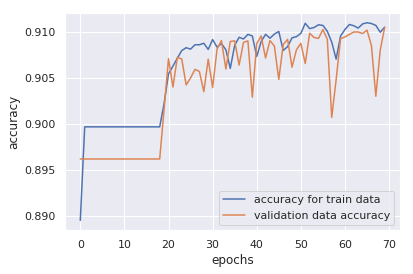

[[45057     0]
 [ 4943     0]]
[0.15200135 0.2692896  0.07303771 ... 0.00958017 0.22189468 0.15470532]
Train on 120000 samples, validate on 30000 samples
Epoch 1/500
 - 2s - loss: 0.2657 - acc: 0.9097 - auc: 0.8062 - val_loss: 0.2596 - val_acc: 0.9085 - val_auc: 0.8063
Epoch 2/500
 - 2s - loss: 0.2729 - acc: 0.9072 - auc: 0.8064 - val_loss: 0.2716 - val_acc: 0.9101 - val_auc: 0.8064
Epoch 3/500
 - 2s - loss: 0.2662 - acc: 0.9099 - auc: 0.8065 - val_loss: 0.2581 - val_acc: 0.9102 - val_auc: 0.8067
Epoch 4/500
 - 2s - loss: 0.2615 - acc: 0.9107 - auc: 0.8069 - val_loss: 0.2570 - val_acc: 0.9111 - val_auc: 0.8071
Epoch 5/500
 - 2s - loss: 0.2602 - acc: 0.9115 - auc: 0.8073 - val_loss: 0.2571 - val_acc: 0.9111 - val_auc: 0.8075
Epoch 6/500
 - 2s - loss: 0.2612 - acc: 0.9114 - auc: 0.8077 - val_loss: 0.2621 - val_acc: 0.9087 - val_auc: 0.8079
Epoch 7/500
 - 2s - loss: 0.2659 - acc: 0.9095 - auc: 0.8080 - val_loss: 0.2691 - val_acc: 0.9110 - val_auc: 0.8081
Epoch 8/500
 - 2s - loss: 0.2663 -

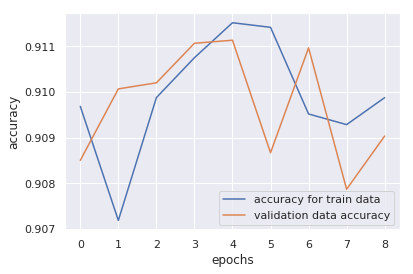

[[44866     0]
 [ 5134     0]]
[0.10002053 0.18110088 0.05226034 ... 0.00499901 0.10402575 0.06834719]


In [28]:
pr1 = train_model_iterate(X, y, test_data)

In [33]:
pr1['mean'] = pr1.mean(axis=1)
pr1.head()

,1,2,mean
0,0.152001,0.100021,0.126011
1,0.269290,0.181101,0.225195
2,0.073038,0.052260,0.062649
3,0.257099,0.148789,0.202944
4,0.121800,0.054939,0.088369


In [34]:
ver = '1.1'
filename = 'submission_{}_{}_'.format(ver, datetime.datetime.now().strftime('%Y-%m-%d'))
target['target'] = pr1['mean']
target.to_csv(filename+'1'+'.csv', index=False)